# Get Dataset IDs to generate Fractional Cover Test Scenes
* Get the dataset IDs for Collection 3 to generate C3 Fractional Cover Test Scenes

In [1]:
%matplotlib inline

import xarray as xr
import sys

#modules for datacube
import datacube
from datacube.utils import masking
from datacube.helpers import ga_pq_fuser

# Import external functions from dea-notebooks
sys.path.append('../Scripts/')

import dea_plotting
from dea_datahandling import load_ard
from odc.ui import with_ui_cbk

%load_ext autoreload
%autoreload 1

In [2]:
# set datacube alias (just a string with what you're doing)
dc = datacube.Datacube(app='dc-FC')

## Try and get a couple of scenes per sensor

define our query area + time

In [3]:
query = {'output_crs':'epsg:3577',
         'resolution':(-30,30),
         'group_by':'solar_day',
         'region_code':"090079",
         'lat':(-27.31, -27.41),
         'lon':(151.01, 151.12)}

In [4]:
LS5_query = {'time':('2008-03-01', '2008-11-01'),'product':'ga_ls5t_ard_3'}         
LS7_query_SLCoff = {'time':('2018-05-01', '2018-06-01'),'product':'ga_ls7e_ard_3'} #grab one SLC off, one SLC-on (1999-2003)
LS7_query_SLCon = {'time':('2002-05-01', '2002-06-01'),'product':'ga_ls7e_ard_3'} #grab one SLC off, one SLC-on (1999-2003)
LS8_query ={'time':('2018-05-01', '2018-06-01'),'product':'ga_ls8c_ard_3'}                                         

In [5]:
LS5_records = dc.find_datasets(**query, **LS5_query)
LS7_records_SLCoff = dc.find_datasets(**query, **LS7_query_SLCoff)
LS7_records_SLCon = dc.find_datasets(**query, **LS7_query_SLCon)
LS8_records = dc.find_datasets(**query, **LS8_query)

### find datasets doesn't play properly with load_ard.. and load ard fails weirdly if you don't supply products as a list, even if you only have one item

In [6]:
LS5 = load_ard(dc,products = ['ga_ls5t_ard_3'], 
               time =LS5_query['time'],
               **query, 
               measurements =['nbart_red','nbart_green','nbart_blue','nbart_nir','nbart_swir_1', 'oa_fmask'],
              progress_cbk=with_ui_cbk())

Finding datasets
    ga_ls5t_ard_3
Applying pixel quality/cloud mask
Loading 5 time steps


In [7]:
LS7off = load_ard(dc,products = ['ga_ls7e_ard_3'], 
               time =LS7_query_SLCoff['time'],
               **query, 
               measurements =['nbart_red','nbart_green','nbart_blue','nbart_nir','nbart_swir_1', 'oa_fmask'],
               progress_cbk=with_ui_cbk())

Finding datasets
    ga_ls7e_ard_3
Applying pixel quality/cloud mask
Loading 2 time steps


In [8]:
LS7on = load_ard(dc, products = ['ga_ls7e_ard_3'], 
                time =LS7_query_SLCon['time'],
                 **query, 
                measurements =['nbart_red','nbart_green','nbart_blue','nbart_nir','nbart_swir_1', 'oa_fmask'], 
                progress_cbk=with_ui_cbk())

Finding datasets
    ga_ls7e_ard_3
Applying pixel quality/cloud mask
Loading 2 time steps


In [9]:
LS8 = load_ard(dc, products =['ga_ls8c_ard_3'],
               time =LS8_query['time'],
               measurements =['nbart_red','nbart_green','nbart_blue','nbart_nir','nbart_swir_1', 'oa_fmask'], 
               **query, 
               progress_cbk=with_ui_cbk())

Finding datasets
    ga_ls8c_ard_3
Applying pixel quality/cloud mask
Loading 2 time steps


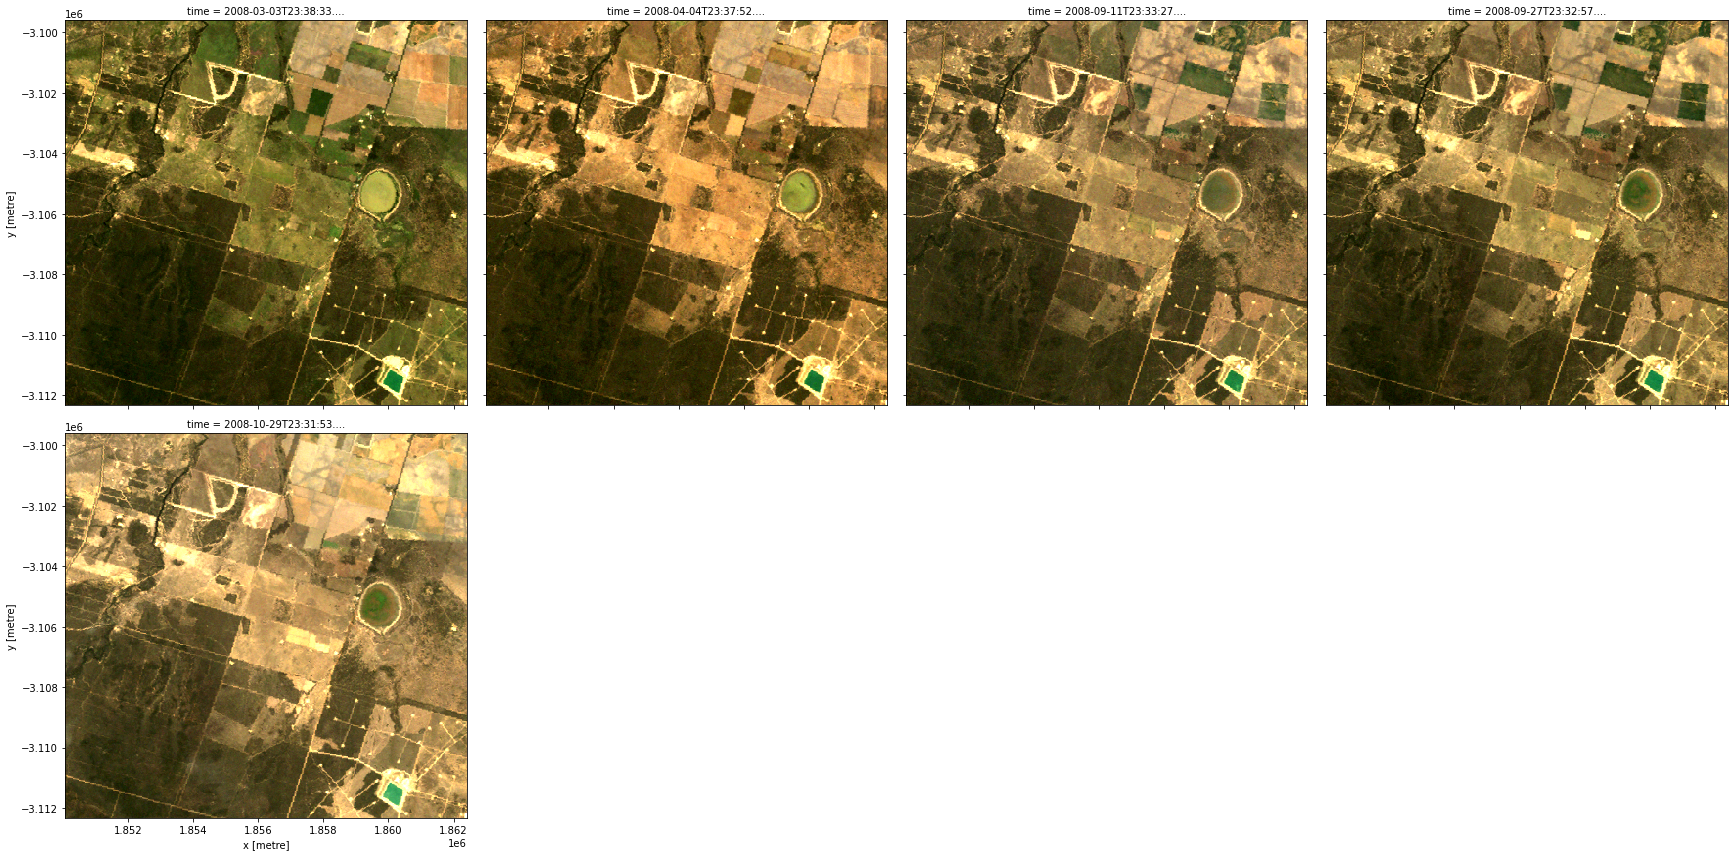

In [10]:
dea_plotting.rgb(LS5, col='time')

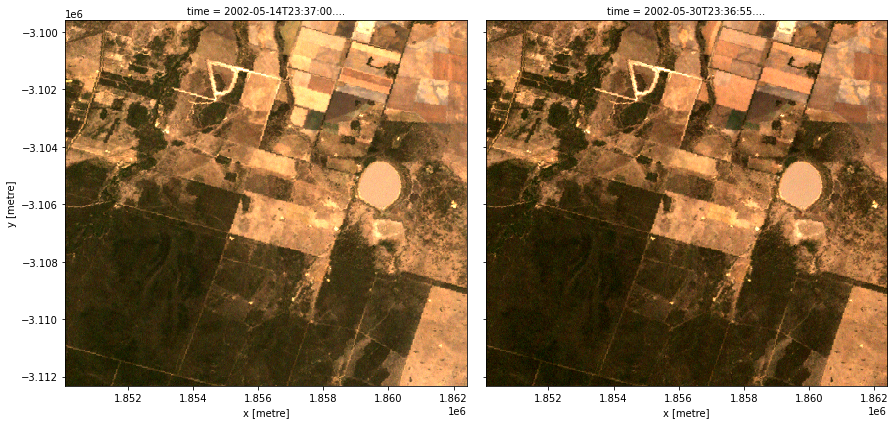

In [11]:
dea_plotting.rgb(LS7on, col='time')

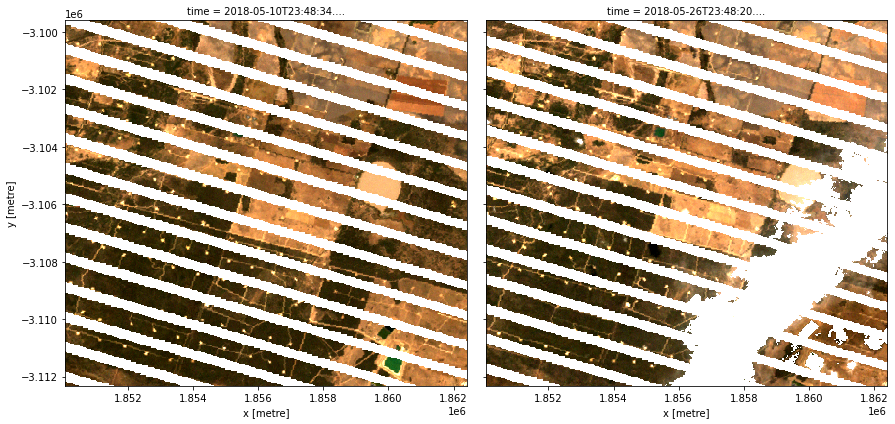

In [12]:
dea_plotting.rgb(LS7off, col='time')

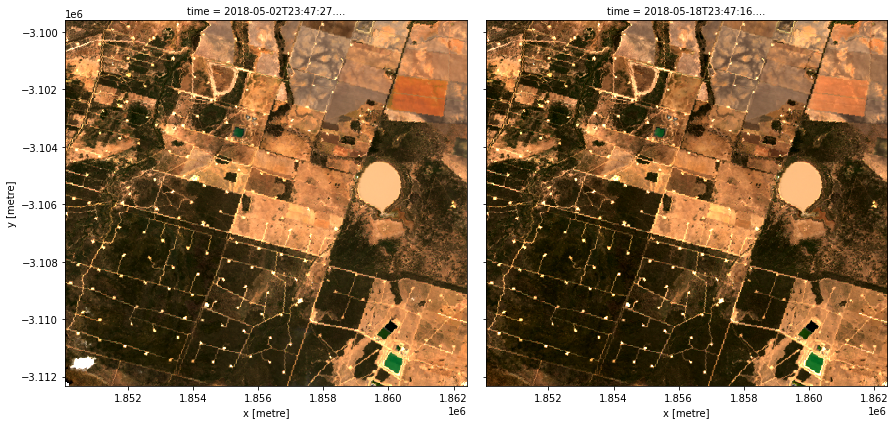

In [13]:
dea_plotting.rgb(LS8, col='time')

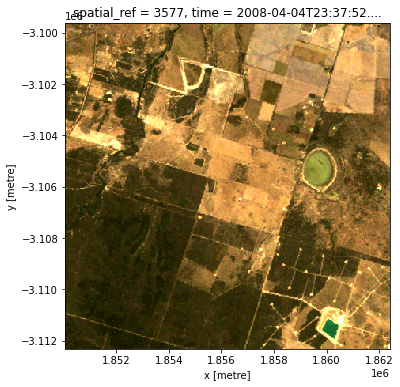

In [14]:
dea_plotting.rgb(LS5.isel(time=1))

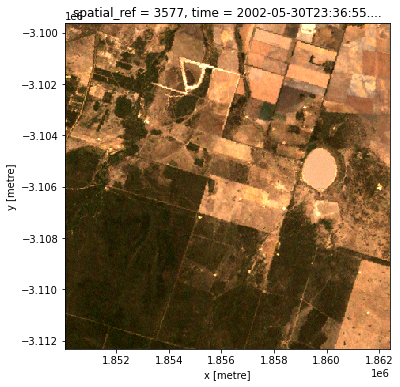

In [15]:
dea_plotting.rgb(LS7on.isel(time=1))

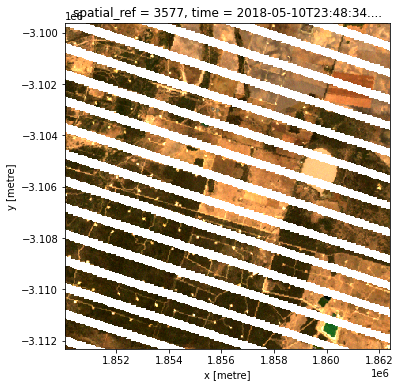

In [16]:
dea_plotting.rgb(LS7off.isel(time=0))

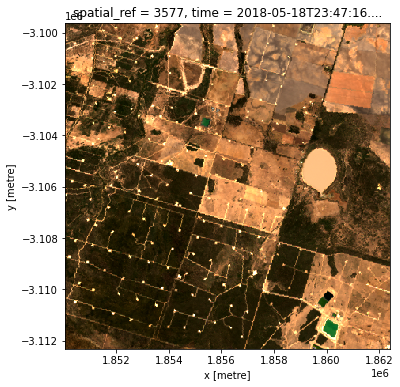

In [17]:
dea_plotting.rgb(LS8.isel(time=1))

### Dataset IDs are not ordered by time, so we do this manually

In [18]:
LS5_records

[Dataset <id=43ff7656-ba3f-48c6-be56-97b330bc278c product=ga_ls5t_ard_3 location=s3://dea-public-data/baseline/ga_ls5t_ard_3/090/079/2008/03/03/ga_ls5t_ard_3-0-0_090079_2008-03-03_final.stac-item.json>,
 Dataset <id=7052f6c4-1c9d-40ec-ab6f-12128eae73a6 product=ga_ls5t_ard_3 location=s3://dea-public-data/baseline/ga_ls5t_ard_3/090/079/2008/09/11/ga_ls5t_ard_3-0-0_090079_2008-09-11_final.stac-item.json>,
 Dataset <id=1d094f0a-8e05-4161-9fbc-631d3728c1af product=ga_ls5t_ard_3 location=s3://dea-public-data/baseline/ga_ls5t_ard_3/090/079/2008/09/27/ga_ls5t_ard_3-0-0_090079_2008-09-27_final.stac-item.json>,
 Dataset <id=7d10c6cc-8ceb-4d57-bd24-fec6b3684f30 product=ga_ls5t_ard_3 location=s3://dea-public-data/baseline/ga_ls5t_ard_3/090/079/2008/10/29/ga_ls5t_ard_3-0-0_090079_2008-10-29_final.stac-item.json>,
 Dataset <id=26931d17-7a4e-4b55-98e7-d6777fb61df6 product=ga_ls5t_ard_3 location=s3://dea-public-data/baseline/ga_ls5t_ard_3/090/079/2008/04/04/ga_ls5t_ard_3-0-0_090079_2008-04-04_final.st

In [19]:
dataset_IDs = [LS5_records[-1],LS7_records_SLCon[0],LS7_records_SLCoff[0],LS8_records[1]]

In [20]:
dataset_IDs

[Dataset <id=26931d17-7a4e-4b55-98e7-d6777fb61df6 product=ga_ls5t_ard_3 location=s3://dea-public-data/baseline/ga_ls5t_ard_3/090/079/2008/04/04/ga_ls5t_ard_3-0-0_090079_2008-04-04_final.stac-item.json>,
 Dataset <id=999d2453-77c3-43dc-993c-8b63346931ef product=ga_ls7e_ard_3 location=s3://dea-public-data/baseline/ga_ls7e_ard_3/090/079/2002/05/30/ga_ls7e_ard_3-0-0_090079_2002-05-30_final.stac-item.json>,
 Dataset <id=0f01048e-1135-4851-a1a5-c9052901afea product=ga_ls7e_ard_3 location=s3://dea-public-data/baseline/ga_ls7e_ard_3/090/079/2018/05/10/ga_ls7e_ard_3-0-0_090079_2018-05-10_final.stac-item.json>,
 Dataset <id=019b75f8-46e8-4abd-a56b-9e9792f8182d product=ga_ls8c_ard_3 location=s3://dea-public-data/baseline/ga_ls8c_ard_3/090/079/2018/05/18/ga_ls8c_ard_3-0-0_090079_2018-05-18_final.stac-item.json>]